# Spectral library

In this tutorial, we will have a look at the L- and T-type spectra from the [IRTF library](http://irtfweb.ifa.hawaii.edu/~spex/IRTF_Spectral_Library/). We will obtain synthetic photometry and combine these together with the spectra in a plot

## Getting started

We start by importing *species* and initiating the database with the `SpeciesInit` class.

In [1]:
import species
species.SpeciesInit()

Initiating species v0.1.4... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


## Adding a spectral library to the database

A `Database` object is created, which is used for adding data to the database.

In [2]:
database = species.Database()

We now will now add the spectral library to the database. For IRTF spectra, we can set the spectral types that we want to download and add to the database. The parallax will be queried from [SIMBAD](http://simbad.u-strasbg.fr/simbad/) and several [VizieR](https://vizier.u-strasbg.fr/viz-bin/VizieR) catalogs. A warning will be printed in case no parallax can be retrieved in which case a `NaN` is stored as distance. Therefore, computing an absolute, synthetic magnitude from these spectra will not be possible.

In [3]:
database.add_spectrum(spec_library='irtf',
                      sptypes=['L', 'T'])

Unpacking IRTF Spectral Library... [DONE]
Adding IRTF Spectral Library... [DONE]                                


/Users/tomasstolker/.pyenv/versions/3.6.0/envs/general3.6/lib/python3.6/site-packages/astroquery/simbad/core.py:138: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'DENIS-P 025503.3-470049.0': this identifier has an incorrect format for catalog: 	DENIS : Deep Near-Infrared Survey
  (error.line, error.msg))
/Users/tomasstolker/applications/species/species/util/query_util.py:306: UserWarning: No parallax was found for DENIS-P 025503.3-470049.0 so storing a NaN value.
  warnings.warn(f'No parallax was found for {target} so storing a NaN value.')
/Users/tomasstolker/.pyenv/versions/3.6.0/envs/general3.6/lib/python3.6/site-packages/astroquery/simbad/core.py:138: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J05591915-1404489
  (error.line, error.msg))
/Users/tomasstolker/applications/species/species/

## Reading a spectral library

We read the data of the spectral library from the database with the `ReadSpectrum` class. The full spectra are read when `filter_name` is set to `None`.

In [4]:
read_spectrum = species.ReadSpectrum(spec_library='irtf',
                                     filter_name=None)

The spectra are extracted with the `get_spectrum` function by setting the spectral types that we want to use.

In [5]:
specbox = read_spectrum.get_spectrum(sptypes=['L0', 'L1'])

## Opening a SpectrumBox

Let's have a look at the attributes that are stored in the `SpectrumBox` that was created by the `get_spectrum` function. Among others, it contains the spectrum, original names (from the IRTF library) and SIMBAD names, and distances.

In [6]:
specbox.open_box()

Opening SpectrumBox...
spectrum = None
wavelength = [array([0.8125008, 0.8125008, 0.8127338, ..., 4.126095 , 4.1269007,
       4.127706 ], dtype=float32)
 array([0.93558633, 0.93558633, 0.93585825, ..., 2.416591  , 2.4171278 ,
       2.417665  ], dtype=float32)
 array([0.8106775 , 0.8106775 , 0.81091094, ..., 4.113586  , 4.1143913 ,
       4.1151967 ], dtype=float32)]
flux = [array([1.8895840e-14, 1.8895840e-14, 2.1758479e-14, ..., 3.7088523e-15,
       4.1113438e-15, 4.4284915e-15], dtype=float32)
 array([-1.0867816e-15, -1.0867816e-15,  2.5373139e-15, ...,
        2.0060095e-15,  2.1450817e-15,  2.2615936e-15], dtype=float32)
 array([3.8497135e-15, 3.8497135e-15, 2.5441878e-15, ..., 1.3200795e-15,
       1.2305833e-15, 1.0569799e-15], dtype=float32)]
error = [array([2.5401353e-15, 2.5401353e-15, 2.8612678e-15, ..., 4.1515258e-16,
       4.3247181e-16, 4.4612945e-16], dtype=float32)
 array([2.2947999e-15, 2.2947999e-15, 1.3184451e-15, ..., 2.5160439e-16,
       1.7856300e-16, 9.854057

## Synthetic photometry

Similarly, we use the `ReadSpectrum` class to obtain synthetic photometry. In this case, we set the `filter_name` to the required tag from the [SVO Filter Profile Service](http://svo2.cab.inta-csic.es/svo/theory/fps/).

In [7]:
read_spectrum = species.ReadSpectrum(spec_library='irtf',
                                     filter_name='MKO/NSFCam.H')

Adding filter: MKO/NSFCam.H... [DONE]


We now use the `get_flux` function with again selecting the L0- and L1-type spectra from the database.

In [8]:
photbox = read_spectrum.get_flux(sptypes=['L0', 'L1'])

## Plotting spectrum and synthetic fluxes

Now that we have created a `SpectrumBox` and `PhotometryBox`, we pass them to the `plot_spectrum` function.

In [9]:
species.plot_spectrum(boxes=[specbox, photbox],
                      filters=['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.Ks'],
                      xlim=(0.9, 2.5),
                      ylim=(0., 8.5e-14),
                      offset=(-0.1, -0.045),
                      legend=(0.65, 0.75),
                      figsize=(8, 4),
                      output='spectrum.png')

Adding filter: MKO/NSFCam.J... [DONE]
Adding filter: MKO/NSFCam.Ks... [DONE]
Plotting spectrum: spectrum.png... [DONE]


Let's have a look at the result! While the uncertainties are propagated with the synthetic photometry, the error bars are smaller than the plotted markers. The horizontal "error bars" of the fluxes indicate the FWHM of the filter profile.

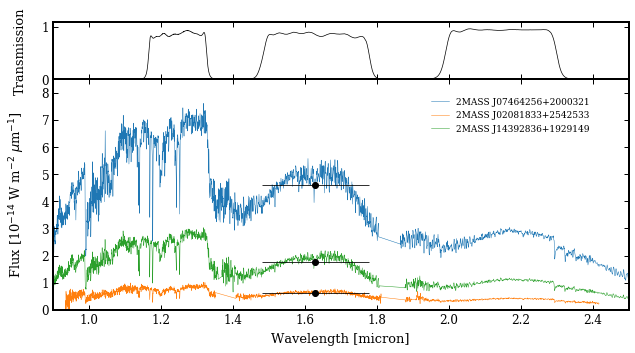

In [10]:
from IPython.display import Image
Image('spectrum.png')